<a href="https://colab.research.google.com/github/LeVuPhuoc/fruits/blob/main/Fruits_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Import thư viện


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.preprocessing.image import load_img,img_to_array
from keras.models import load_model

#2. Gán nhãn dữ liệu

In [61]:

labels = ['bananas','blueberries','grapes','guava','oranges','pears','pineapples','raspberries','strawberries','watermelons']

In [62]:
N = 30
namefruit = ['bananas','blueberries','grapes','guava','oranges','pears','pineapples','raspberries','strawberries','watermelons']
Img_data = np.zeros((N*10,32,32,3), dtype=np.float32)
#Chuyển ảnh thành mảng
for name in range(0,10):
  for i in range(0,N): 
    img = cv2.imread(namefruit[name]+str(i)+'.jpg',cv2.IMREAD_COLOR)
    Img_data[name*30+i][::][::][::] = img

In [63]:
Name = np.zeros((N*10), dtype=np.float32)
for i in range(0,10):
  for j in range(0,N):
    Name[i*N+j] = i


# 3. Lấy data và train

In [64]:
x_train,x_test,y_train,y_test = train_test_split(Img_data,Name,test_size=0.2)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [67]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (32,32,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 128)        

In [68]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 4, epochs = 50,verbose = 1, validation_data =(x_test,y_test))

Epoch 1/50
60/60 [==============================] - 2s 12ms/step - loss: 2.3090 - accuracy: 0.1000 - val_loss: 2.0772 - val_accuracy: 0.1500
Epoch 2/50
60/60 [==============================] - 1s 8ms/step - loss: 2.0810 - accuracy: 0.1917 - val_loss: 2.1298 - val_accuracy: 0.2167
Epoch 3/50
60/60 [==============================] - 0s 8ms/step - loss: 2.0840 - accuracy: 0.2125 - val_loss: 2.2129 - val_accuracy: 0.1000
Epoch 4/50
60/60 [==============================] - 0s 8ms/step - loss: 2.0196 - accuracy: 0.2250 - val_loss: 1.8359 - val_accuracy: 0.3167
Epoch 5/50
60/60 [==============================] - 0s 8ms/step - loss: 1.6579 - accuracy: 0.3417 - val_loss: 1.8076 - val_accuracy: 0.2167
Epoch 6/50
60/60 [==============================] - 1s 8ms/step - loss: 1.5086 - accuracy: 0.4042 - val_loss: 1.7707 - val_accuracy: 0.2833
Epoch 7/50
60/60 [==============================] - 0s 8ms/step - loss: 1.5398 - accuracy: 0.4375 - val_loss: 1.6633 - val_accuracy: 0.3000
Epoch 8/50
60/60 [=

# 4. Vẽ đồ thị

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


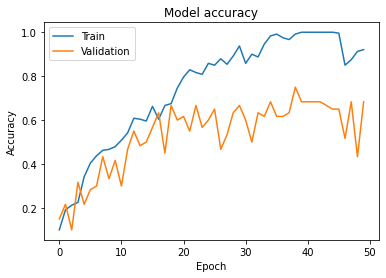

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

#5. kiểm tra lại


grapes


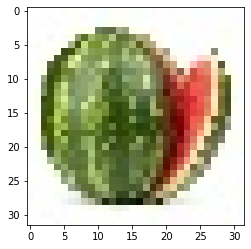

In [72]:
name_img = 'watermelons_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])

oranges


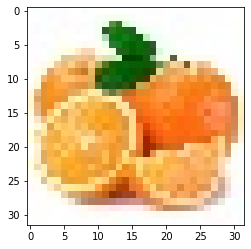

In [73]:
name_img = 'oranges_test.jpg'
Img_data = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_data = Img_data.reshape(1,32,32,3)
Img_data = Img_data.astype('float32')
Img_data/=255.0
Img_show = cv2.imread(name_img,cv2.IMREAD_COLOR)
Img_show = cv2.cvtColor(Img_show, cv2.COLOR_BGR2RGB)
plt.imshow(Img_show)
print(labels[np.argmax(model.predict(Img_data))])